<a href="https://colab.research.google.com/github/NsikakMenim/Machine-Learning-Portfolio./blob/main/MNIST_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the RNN model
model = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7332 - loss: 0.7912 - val_accuracy: 0.9297 - val_loss: 0.2637
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9313 - loss: 0.2343 - val_accuracy: 0.9519 - val_loss: 0.1704
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9458 - loss: 0.1911 - val_accuracy: 0.9552 - val_loss: 0.1577
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9533 - loss: 0.1643 - val_accuracy: 0.9626 - val_loss: 0.1307
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9561 - loss: 0.1555 - val_accuracy: 0.9567 - val_loss: 0.1577
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9606 - loss: 0.1405 - val_accuracy: 0.9676 - val_loss: 0.1184
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9631 - loss: 0.1328 - val_accuracy: 0.9682 - val_loss: 0.1090
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9643 - loss: 0

In [ ]:
# Create a DataFrame from the history object
metrics = pd.DataFrame(model.history.history)


In [ ]:
metrics[["loss", "val_loss", "accuracy", "val_accuracy"]]

,loss,val_loss,accuracy,val_accuracy
0,0.476026,0.263672,0.849354,0.929667
1,0.223872,0.170418,0.934771,0.951917
2,0.190549,0.157736,0.945417,0.955167
3,0.167924,0.130720,0.952000,0.962583
4,0.152766,0.157696,0.956854,0.956667
5,0.138778,0.118419,0.960458,0.967583
6,0.131841,0.108973,0.963104,0.968167
7,0.127656,0.121377,0.963313,0.966750
8,0.113773,0.109915,0.968708,0.969167
9,0.111842,0.104181,0.969854,0.972167


<Axes: >

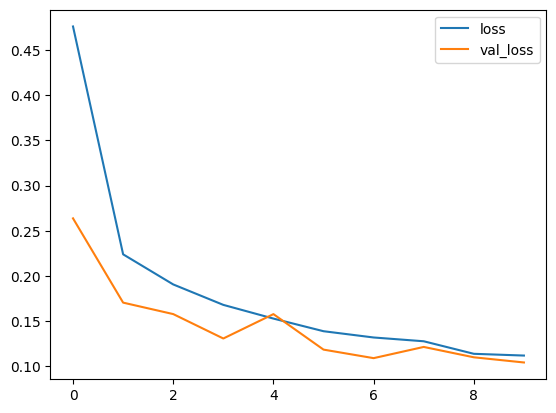

In [ ]:
metrics[["loss", "val_loss"]].plot()

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
# Evaluate the model
model.evaluate(x_test, y_test, verbose=0)


[0.10602916032075882, 0.9696999788284302]

In [ ]:
confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

array([[ 961,    0,    1,    0,    2,    1,    5,    1,    4,    5],
       [   1, 1111,    3,    2,    0,    4,    7,    3,    3,    1],
       [   2,    1, 1020,    2,    2,    0,    0,    2,    2,    1],
       [   0,    1,    4,  988,    0,   10,    0,    2,    2,    3],
       [   0,    1,    0,    0,  944,    0,    5,    3,    1,   28],
       [   1,    1,    2,    7,    3,  858,    8,    1,    5,    6],
       [   6,    2,    2,    0,    4,    1,  942,    0,    1,    0],
       [   1,    1,   30,    6,    1,    0,    0,  980,    3,    6],
       [   5,    0,    6,    7,    6,    3,   14,    3,  927,    3],
       [   4,    2,    1,    3,    9,    0,    0,    6,   18,  966]])

<Axes: >

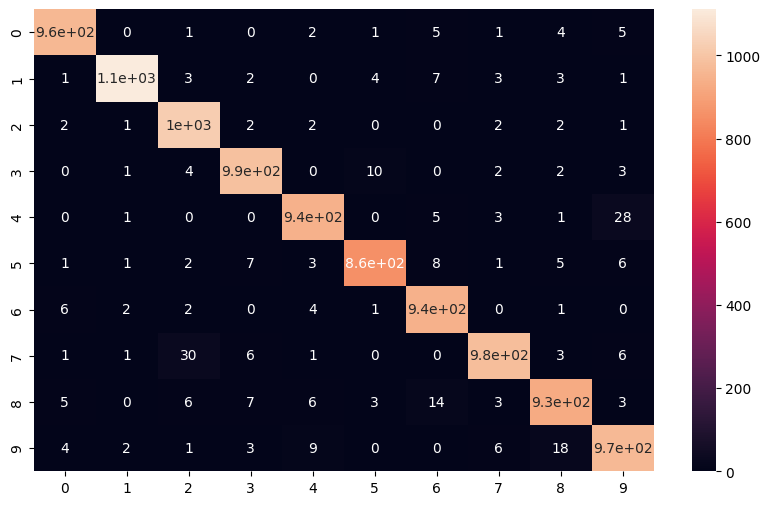

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)), annot=True)

In [ ]:

# Reshape the input image to (1, 28, 28) instead of (1, 28, 28, 1)
predictions = model.predict(x_test[0].reshape(1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


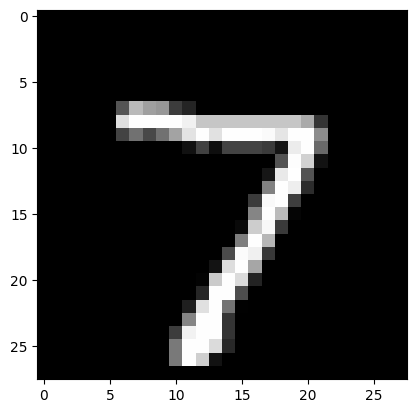

In [ ]:
plt.imshow(x_test[0].reshape(28, 28), cmap="gray")

In [ ]:
# num_images, width, height, colour_channels
predictions = model.predict(x_test[0].reshape(1, 28, 28))
predicted_class = np.argmax(predictions, axis=1)
predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([7])